# A Guide to Metrics (Estimates) in Exploratory Data Analysis

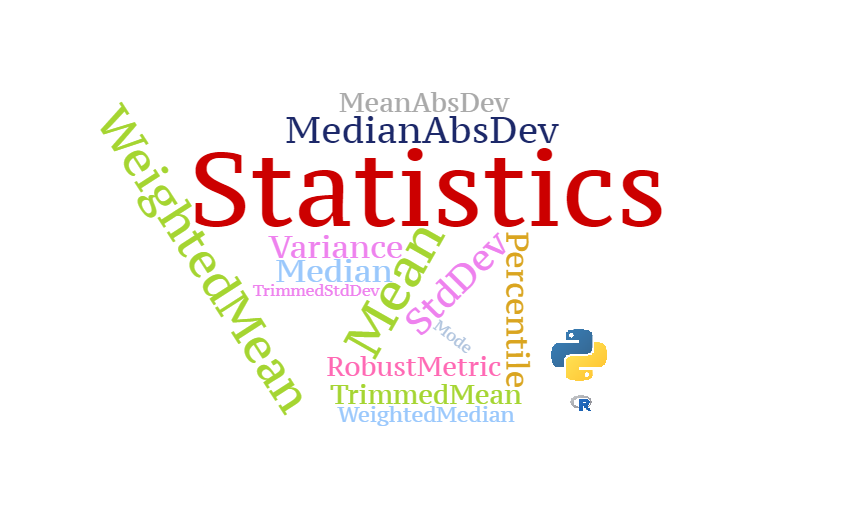

In [1]:
from IPython import display
display.Image("https://www.ealizadeh.com/wp-content/uploads/2020/12/bp08_featured_image.png")

**Website: https://ealizadeh.com**

**Medium: https://medium.com/@ealizadeh**

Copyright © 2020 Esmaeil Alizadeh

---

Exploratory data analysis (EDA) is an important step in any data science project. We always try to get a glance of our data by computing descriptive statistics of our dataset. If you are like me, the first function you call might be Pandas dataframe.describe() to obtain descriptive statistics. While such analysis is important, we often underestimate the importance of choosing the correct sample statistics/metrics/estimates.

In this post, we will go over several metrics that you can use in your data science projects. In particular, we are going to cover several estimates of location and variability and their robustness (sensitiveness to outliers).

The following common metrics/estimates are covered in this article:
- Estimates of location (first moment of the distribution)
   - mean, trimmed/truncated mean, weighted mean
   - median, weighted median
- Estimates of variability (second moment of the distribution)
   - range
   - variance and standard deviation
   - mean absolute deviation, median absolute deviation
   - percentiles (quantiles)
   
For each metric, we will cover:
- The definition and mathematical formulation along with some insights.
- Whether the metric is robust (sensitiveness to extreme cases)
- Python implementation and an example

Note: The focus of this article is on the metrics and estimates used in the univariate analysis of numeric data.

## Estimates of Location

Estimates of location are measures of the central tendency of the data (where most of the data is located). In statistics, this is usually referred to as the first moment of a distribution.

### Python Implementation

Let's first import all necessary Python libraries and generate our dataset.

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import robustats 

df = pd.DataFrame({
    "data": [2, 1, 2, 3, 2, 2, 3, 20],
    "weights": [1, 0.5, 1, 1, 1, 1, 1, 0.5] # Not necessarily add up to 1!!
})
data, weights = df["data"], df["weights"]

You can use NumPy's average() function to calculate the mean and weighted mean (equations 1.1 & 1.2). For computing truncated mean, you can use trim_mean() from the SciPy stats module. A common choice for truncating the top and bottom of the data is 10%[1].

You can use NumPy's median() function to calculate the median. For computing the weighted median, you can use weighted_median() from the robustats Python library (you can install it using pip install robustats). Robustats is a high-performance Python library to compute robust statistical estimators implemented in C.

For computing the mode, you can either use the mode() function either from the robustats library that is particularly useful on large datasets or from scipy.stats module.

In [3]:
mean = np.average(data) # You can use Pandas dataframe.mean()
weighted_mean = np.average(data, weights=weights)
truncated_mean = stats.trim_mean(data, proportiontocut=0.1)
median = np.median(data) # You can use Pandas dataframe.median()
weighted_median = robustats.weighted_median(x=data, weights=weights)
mode = stats.mode(data)  # You can also use robustats.mode() on larger datasets


print("Mean: ", mean.round(3))
print("Weighted Mean: ", weighted_mean.round(3))
print("Truncated Mean: ", truncated_mean.round(3))
print("Median: ", median)
print("Weighted Median: ", weighted_median)
print("Mode: ", mode)

Mean:  4.375
Weighted Mean:  3.5
Truncated Mean:  4.375
Median:  2.0
Weighted Median:  2.0
Mode:  ModeResult(mode=array([2]), count=array([4]))


Now, let's see if we just remove 20 from our data, how that will impact our mean. 

In [4]:
mean = np.average(data[:-1]) # Remove the last data point (20)
print("Mean: ", mean.round(3))

Mean:  2.143


You can see how the last data point (20) impacted the mean (4.375 vs 2.143). There can be many situations that we may end up with some outliers that should be cleaned from our datasets like faulty measurements that are in orders of magnitude away from other data points.

## Estimates of Variability
The second dimension (or moment) addresses how the data is spread out (variability or dispersion of the data). For this, we have to measure the difference (aka residual) between an estimate of location and an observed value[1].

### Python Implementation

You can use NumPy's var() and std() function to calculate the variance and standard deviation, respectively. On the other hand, to calculate the mean absolute deviation, you can use Pandas mad() function. For computing the trimmed standard deviation, you can use SciPy's tstd() from the stats module. You can use Pandas boxplot() to quickly visualize a boxplot of the data. 

#### Example: Variability Estimates of State Population 

In [5]:
variance = np.var(data)
standard_deviation = np.std(data)  # df["Population"].std()
mean_absolute_deviation = df["data"].mad()
trimmed_standard_deviation = stats.tstd(data)
median_absolute_deviation = stats.median_abs_deviation(data, scale="normal")  # stats.median_absolute_deviation() is deprecated

# Percentile
Q1 = np.quantile(data, q=0.25)  # Can also use data.quantile(0.25)
Q3 = np.quantile(data, q=0.75)  # Can also use data.quantile(0.75)
IQR = Q3 - Q1

print("Variance: ", variance.round(3))
print("Standard Deviation: ", standard_deviation.round(3))
print("Mean Absolute Deviation: ", mean_absolute_deviation.round(3))
print("Trimmed Standard Deviation: ", trimmed_standard_deviation.round(3))
print("Median Absolute Deviation: ", median_absolute_deviation.round(3))
print("Interquantile Range (IQR): ", IQR)

Variance:  35.234
Standard Deviation:  5.936
Mean Absolute Deviation:  3.906
Trimmed Standard Deviation:  6.346
Median Absolute Deviation:  0.741
Interquantile Range (IQR):  1.0


## Conclusion
In this post, I talked about various estimates of location and variability. In particular, I covered more than 10 different sample statistics and whether they are robust metrics or not. A table of all the metric along with their corresponding Python and R functions are summarized in Table 3. We also saw how the presence of an outlier may impact non-robust metrics like the mean. In this case, we may want to use a robust estimate. However, in some problems, we are interested in studying extreme cases and outliers such as anomaly detection.  

Thanks for reading!

## References

[1] P. Bruce & A. Bruce (2017), *Practical Statistics for Data Scientists*, First Edition, O'Reilly

[2] Wikipedia, [Truncated mean](https://en.wikipedia.org/wiki/Truncated_mean)

## Useful Links
[1] Michael Galarnyk (2018), [Understanding Boxplots](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51), Towards Data Science blog